In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import HDBSCAN, DBSCAN, KMeans
import seaborn as sns

from helper_functions import distance_between_points

In [5]:
# reading the data
disasters_df = pd.read_csv('./datasets/public_emdat_disasters.csv')

# disasters_df = disasters_df.copy()
disasters_df['Year'] = disasters_df['DisNo.']
disasters_df['Year'] = disasters_df['Year'].apply(lambda x: int((str(x).split("-"))[0]))


print(len(disasters_df['Latitude']))

20808


### Removing Historical Data

In [6]:
print(len(disasters_df))
non_historic_disasters_df = disasters_df[disasters_df['Historic'] == 'No']
print(len(non_historic_disasters_df))

20808
10031


Now we can plot again and see what it looks like

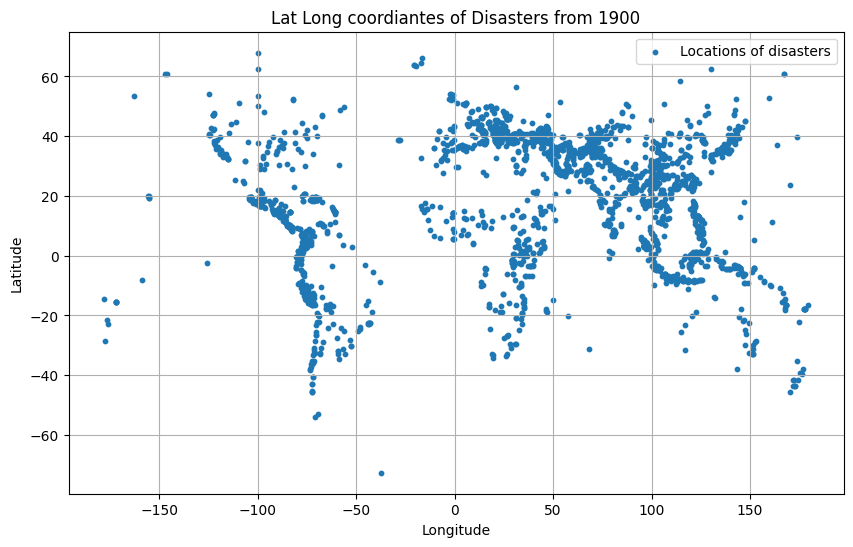

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(disasters_df['Longitude'], disasters_df['Latitude'], label="Locations of disasters", s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat Long coordiantes of Disasters from 1900')
plt.legend()
plt.grid(True)

In [8]:
non_historic_disasters_df['Total_Deaths'].describe()

count      8174.000000
mean        166.462809
std        3784.267352
min           1.000000
25%          10.000000
50%          17.000000
75%          33.000000
max      222570.000000
Name: Total_Deaths, dtype: float64

Line plot showing the number of deaths per year

In [9]:
# getting the cumulative number of deaths per year
years = [x for x in range(non_historic_disasters_df['Year'].min(), non_historic_disasters_df['Year'].max() + 1)]
year_deaths_df = pd.DataFrame({'Year': years})
year_deaths_df['Total_Deaths'] = non_historic_disasters_df.groupby(['Year'])['Total_Deaths'].sum().values

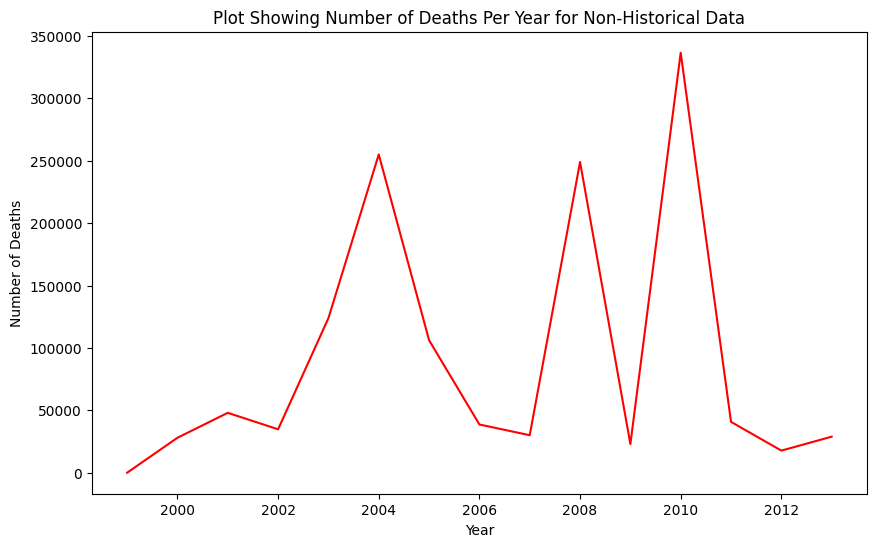

In [10]:
# plotting this value

plt.figure(figsize=(10, 6))
plt.plot(year_deaths_df['Year'], year_deaths_df['Total_Deaths'], 'r-')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Plot Showing Number of Deaths Per Year for Non-Historical Data')
plt.show()

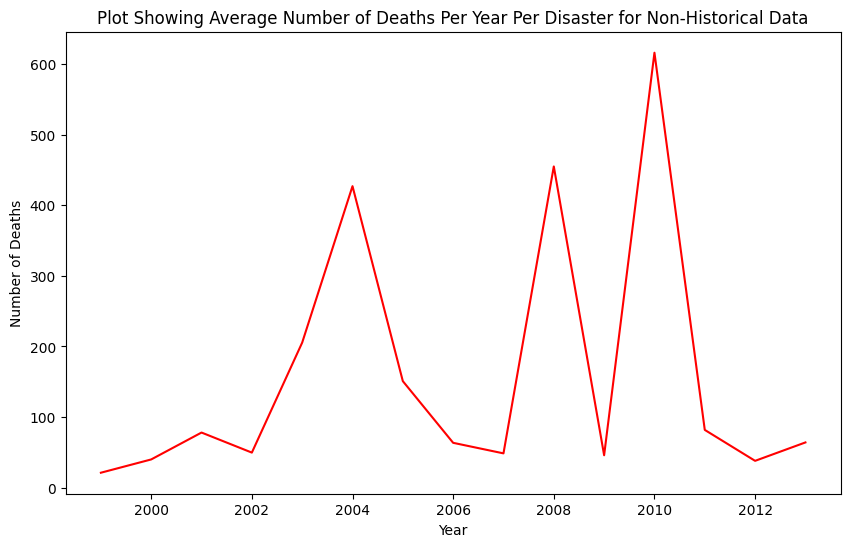

In [11]:
# Average deaths
year_deaths_df['Average_Deaths'] = non_historic_disasters_df.groupby(['Year'])['Total_Deaths'].mean().values

plt.figure(figsize=(10, 6))
plt.plot(year_deaths_df['Year'], year_deaths_df['Average_Deaths'], 'r-')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Plot Showing Average Number of Deaths Per Year Per Disaster for Non-Historical Data')
plt.show()


What does this look like for historic data?

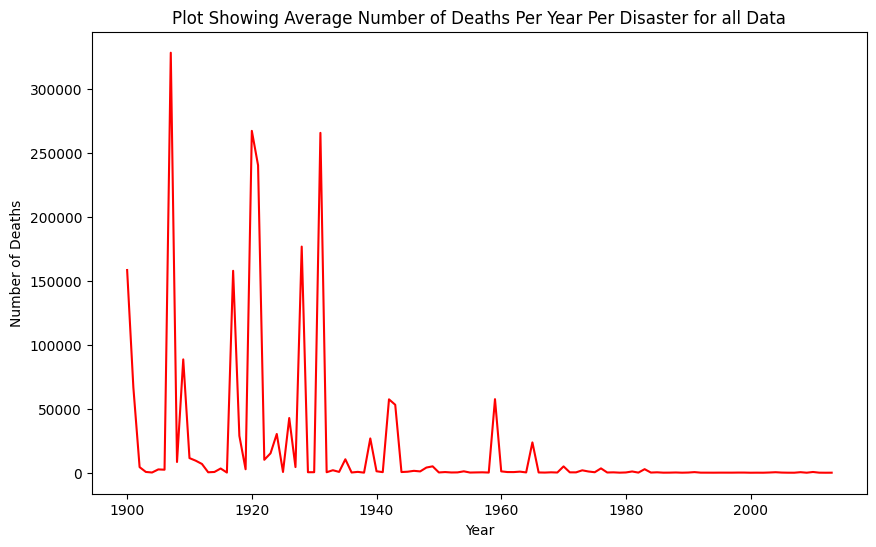

In [12]:
# Average deaths
years = [x for x in range(disasters_df['Year'].min(), disasters_df['Year'].max()+1)]

year_deaths_df = pd.DataFrame({'Year': years})
year_deaths_df['Historic_Average_Deaths'] = disasters_df.groupby(['Year'])['Total_Deaths'].mean().values

plt.figure(figsize=(10, 6))
plt.plot(year_deaths_df['Year'], year_deaths_df['Historic_Average_Deaths'], 'r-')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Plot Showing Average Number of Deaths Per Year Per Disaster for all Data')
plt.show()

This shows us that things are getting a lot safer as deaths are coming down.

But can we look at the frequency of disasters per year, can this begin to tell us the affects of climate change on the natural world.




In [13]:
# frequency of disasters per year

# using historic data
years = [x for x in range(disasters_df['Year'].min(), disasters_df['Year'].max()+1)]

freq_df = pd.DataFrame({'Year' : years})
freq_df['Freq'] = disasters_df.groupby(['Year']).size().values

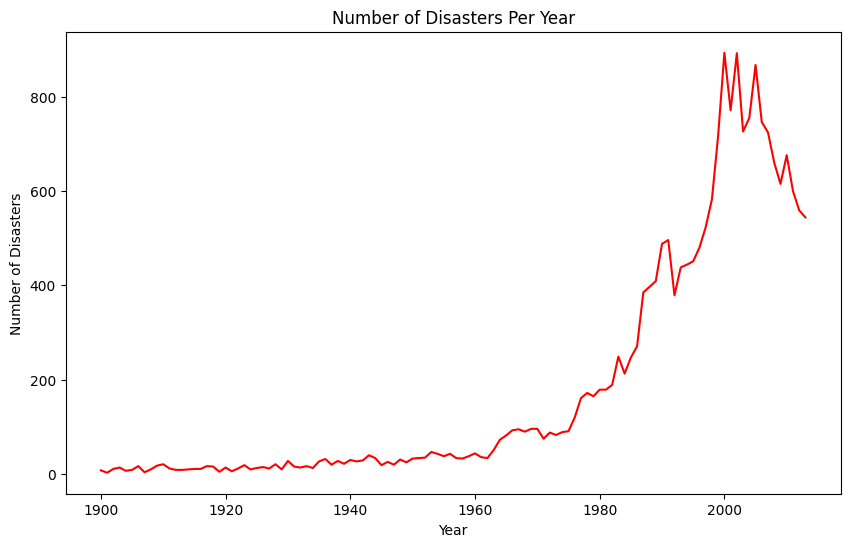

In [14]:
# plotting this data

plt.figure(figsize=(10, 6))
plt.plot(freq_df['Year'], freq_df['Freq'], 'r-')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters Per Year')
plt.show()

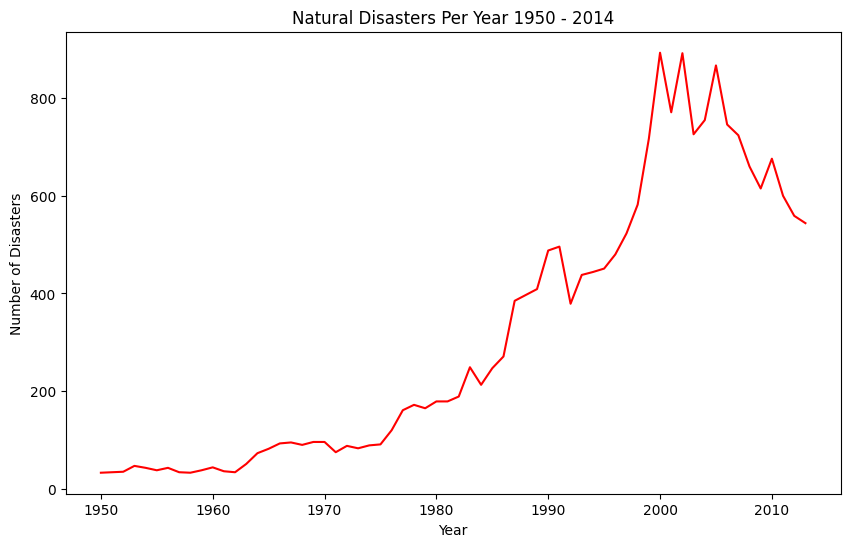

In [15]:
# Same plot with data from start_year onwards
start_year = 1950
end_year = disasters_df['Year'].max() + 1
years = [x for x in range(start_year, end_year)]

non_historic_freq_df = pd.DataFrame({'Year' : years})
non_historic_freq_df['Freq'] = disasters_df[disasters_df['Year'] >= start_year].groupby(['Year']).size().values

plt.figure(figsize=(10, 6))
plt.plot(non_historic_freq_df['Year'], non_historic_freq_df['Freq'], 'r-')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title(f'Natural Disasters Per Year {start_year} - {end_year}')
plt.show()

What does this graph look like for non historic disasters?

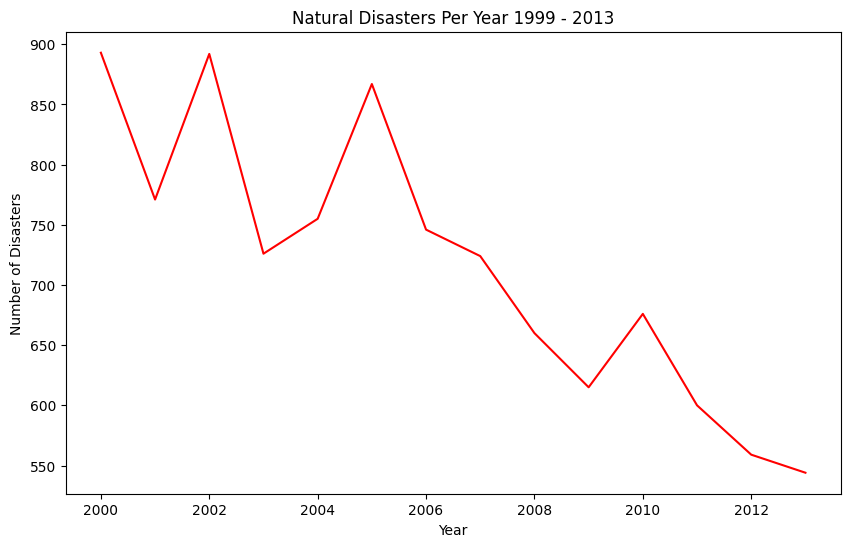

In [16]:
years = non_historic_disasters_df['Year'].unique()
non_historic_freq_df = pd.DataFrame({'Year' : years[1:]})
non_historic_freq_df['Freq'] = non_historic_disasters_df[non_historic_disasters_df['Year'] > years[0]].groupby(['Year']).size().values

plt.figure(figsize=(10, 6))
plt.plot(non_historic_freq_df['Year'], non_historic_freq_df['Freq'], 'r-')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title(f'Natural Disasters Per Year {years[0]} - {years[-1]}')
plt.show()

### Predicting Temperatures in the Future

In [17]:
temps_df = pd.read_csv('./datasets/GlobalLandTemperaturesByCountry.csv')

In [18]:
# dropping missed data to clean the dataset
temps_clean_df = temps_df.dropna()

# adding Year column
temps_clean_df = temps_clean_df.copy()
temps_clean_df['dt'] = pd.to_datetime(temps_clean_df['dt'])
temps_clean_df['Year'] = temps_clean_df['dt'].dt.year

Getting an average temperatue dataframe

In [19]:
years = temps_clean_df['Year'].unique()
average_temperature_df = pd.DataFrame({'Year' : years})
average_temperature_df['AverageTemperature'] = temps_clean_df.groupby(['Year'])['AverageTemperature'].mean().values

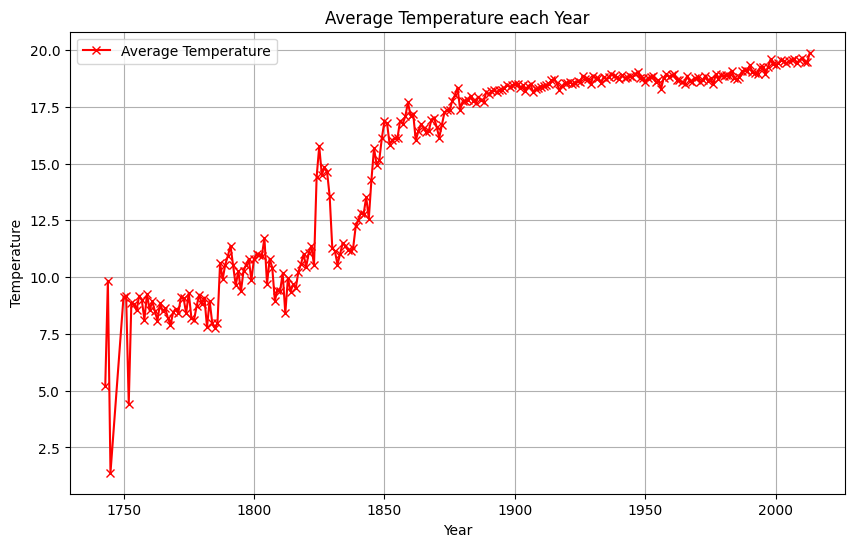

In [20]:
# plotting this data

plt.figure(figsize=(10, 6))
plt.plot(average_temperature_df['Year'], average_temperature_df['AverageTemperature'], 'rx-', label='Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Temperature each Year')
plt.legend()
plt.grid(True)
plt.show()

Such a spike ... what is the reporting metrics like

In [21]:
years = temps_clean_df['Year'].unique()
metrics_df = pd.DataFrame({
    'Year' : years,
    'NumReported' : [temps_clean_df[temps_clean_df['Year'] == year].size for year in years]
    })

metrics_df['Change'] = metrics_df['NumReported'].diff()

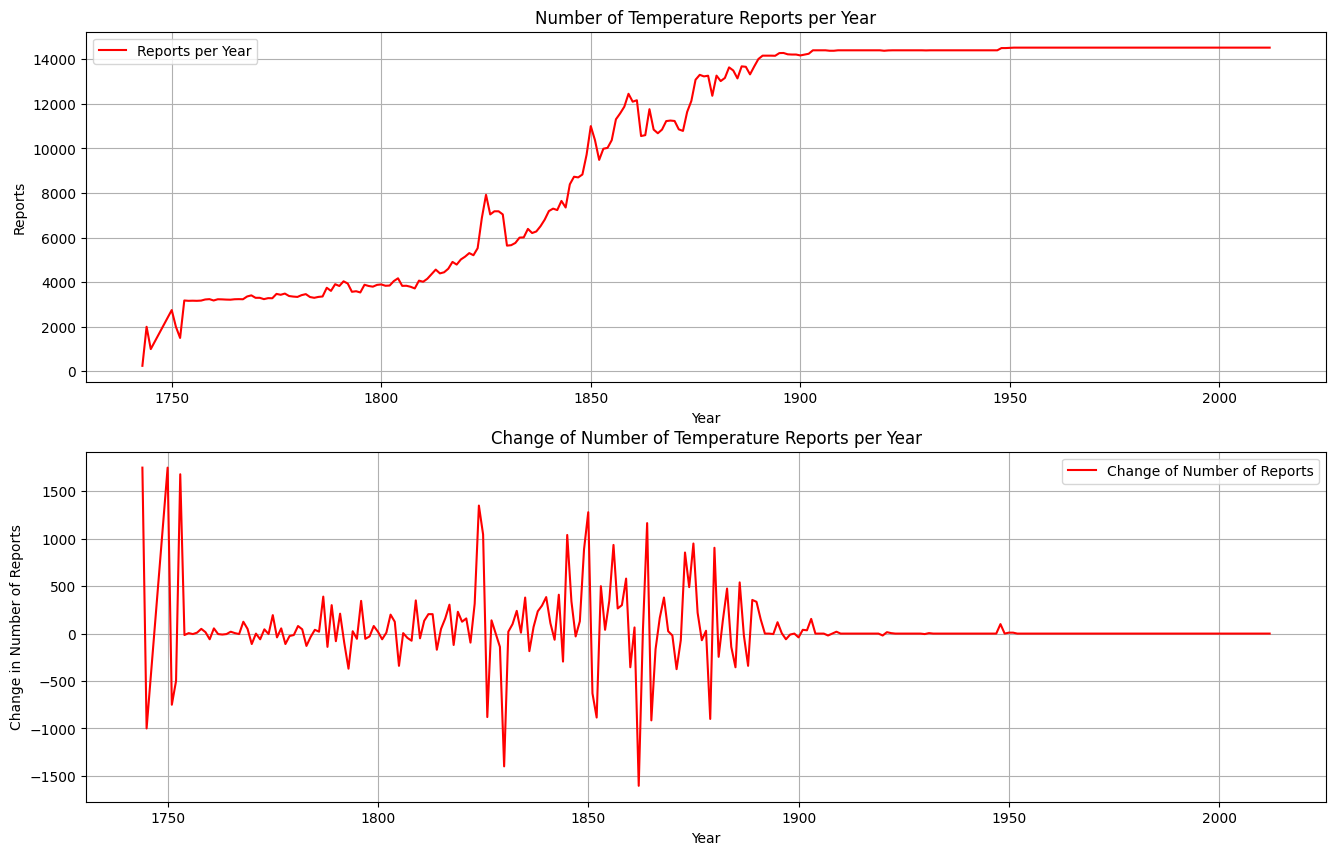

In [22]:
# final year drastically drops off - we remove this row as it skews the plot
metrics_df = metrics_df[metrics_df['Year'] != 2013]

plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.plot(metrics_df['Year'], metrics_df['NumReported'], 'r-', label='Reports per Year')
plt.xlabel('Year')
plt.ylabel('Reports')
plt.title('Number of Temperature Reports per Year')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(metrics_df['Year'], metrics_df['Change'], 'r-', label='Change of Number of Reports')
plt.xlabel('Year')
plt.ylabel('Change in Number of Reports')
plt.title('Change of Number of Temperature Reports per Year')
plt.grid(True)
plt.legend()

plt.show()

Using the above graphs - we can see that the reporting data only becomes stable after the year 1900 - therefore we can update the temps_clean_df for predicting temperatures to only include data after 1900.

### Predicting Future Temperatures

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
stable_average_temperature_df = average_temperature_df[average_temperature_df['Year'] > 1900]

In [25]:
X, y = stable_average_temperature_df[['Year']], stable_average_temperature_df['AverageTemperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

last_year = stable_average_temperature_df['Year'].min()
years_ahead = [(last_year + (i * 10)) for i in range(16)]

future_temperatures_df = pd.DataFrame({'Year' : years_ahead})
future_temperatures_df['PredictedAverageTemperature'] = model.predict(future_temperatures_df)


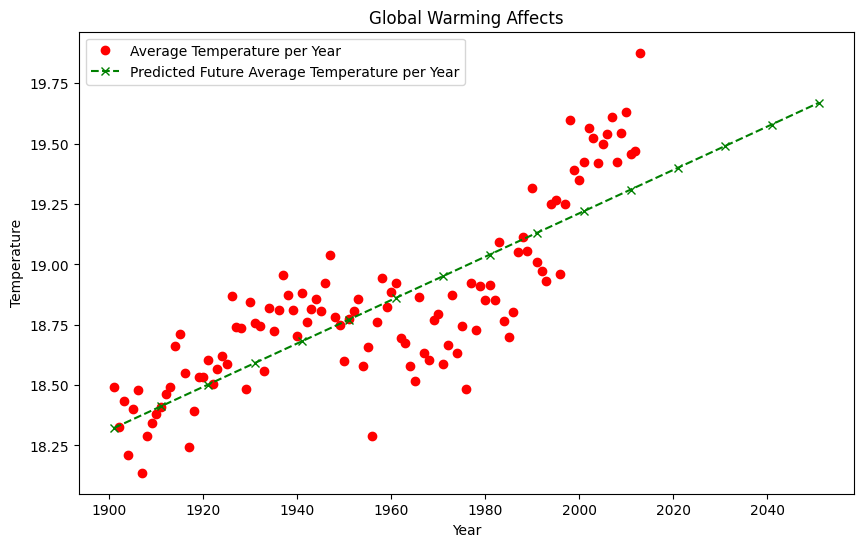

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(stable_average_temperature_df['Year'], stable_average_temperature_df['AverageTemperature'], 'ro', label='Average Temperature per Year')
plt.plot(future_temperatures_df['Year'], future_temperatures_df['PredictedAverageTemperature'], 'gx--', label='Predicted Future Average Temperature per Year')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Global Warming Affects')
plt.legend()
plt.show()

### Evaluating the Accuracy of the Model

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [28]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Square Error: {mse}")
print(f"Root Mean Square Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared Score: {r2}")

Mean Square Error: 0.03272320351242016
Root Mean Square Error: 0.18089555968132595
Mean Absolute Error: 0.15538802425768516
R-Squared Score: 0.6892647960994045


Looking at this data does a **Polynomial Regression** model fit better ?

In [29]:
### POLYNOMIAL MODEL
from sklearn.preprocessing import PolynomialFeatures

In [30]:
### 2nd Order Polynomial
poly2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_features = poly2.fit_transform(X_train)

poly2_model = LinearRegression()
poly2_model.fit(poly2_features, y_train)

### 3rd Order Polynomial
poly3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_features = poly3.fit_transform(X_train)

poly3_model = LinearRegression()
poly3_model.fit(poly3_features, y_train)

LinearRegression()

Evaluating the accuracy of our new polynomial regression model

In [31]:
### 2nd Order
poly2_years_ahead = poly2.fit_transform(np.asarray(years_ahead).reshape(-1, 1))
poly2_predictions = poly2_model.predict(poly2_years_ahead)

future_temperatures_poly2_df = pd.DataFrame({'Year' : years_ahead})
future_temperatures_poly2_df['PredictedAverageTemperature'] = poly2_predictions

### 3rd Order
poly3_years_ahead = poly3.fit_transform(np.asarray(years_ahead).reshape(-1, 1))
poly3_predictions = poly3_model.predict(poly3_years_ahead)

future_temperatures_poly3_df = pd.DataFrame({'Year' : years_ahead})
future_temperatures_poly3_df['PredictedAverageTemperature'] = poly3_predictions

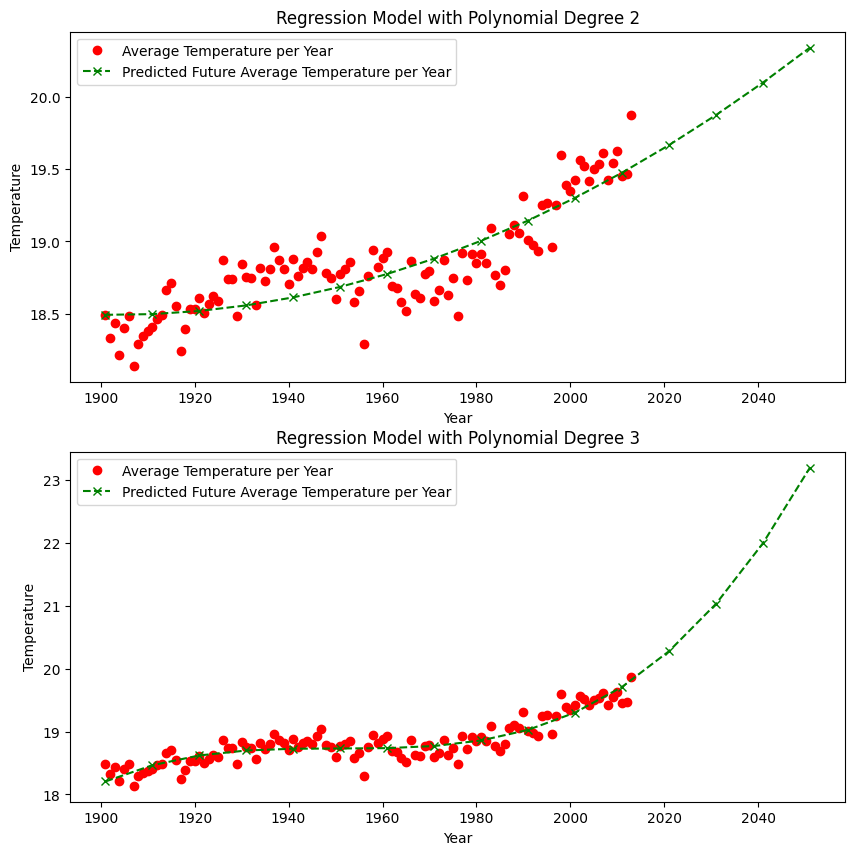

In [32]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(stable_average_temperature_df['Year'], stable_average_temperature_df['AverageTemperature'], 'ro', label='Average Temperature per Year')
plt.plot(future_temperatures_poly2_df['Year'], future_temperatures_poly2_df['PredictedAverageTemperature'], 'gx--', label='Predicted Future Average Temperature per Year')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Regression Model with Polynomial Degree 2')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(stable_average_temperature_df['Year'], stable_average_temperature_df['AverageTemperature'], 'ro', label='Average Temperature per Year')
plt.plot(future_temperatures_poly3_df['Year'], future_temperatures_poly3_df['PredictedAverageTemperature'], 'gx--', label='Predicted Future Average Temperature per Year')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Regression Model with Polynomial Degree 3')
plt.legend()


plt.show()

**Evaluating the accuracy of these models**

In [33]:
poly2_test = poly2.fit_transform(X_test)
poly3_test = poly3.fit_transform(X_test)

poly2_test_predictions = poly2_model.predict(poly2_test)
poly3_test_predictions = poly3_model.predict(poly3_test)

poly2_mse = mean_squared_error(y_test, poly2_test_predictions)
poly2_mae = mean_absolute_error(y_test, poly2_test_predictions)
poly2_r2 = r2_score(y_test, poly2_test_predictions)

poly3_mse = mean_squared_error(y_test, poly3_test_predictions)
poly3_mae = mean_absolute_error(y_test, poly3_test_predictions)
poly3_r2 = r2_score(y_test, poly3_test_predictions)

print(f"2nd Order Polynomial Regression")
print(f"Mean Squared Error: {poly2_mse}")
print(f"Mean Absolute Erorr: {poly2_mae}")
print(f"R2 Score: {poly2_r2}")

print("\n\n")
print(f"3rd Order Polynomial Regression")
print(f"Mean Squared Error: {poly3_mse}")
print(f"Mean Absolute Erorr: {poly3_mae}")
print(f"R2 Score: {poly3_r2}")

2nd Order Polynomial Regression
Mean Squared Error: 0.02571257448085198
Mean Absolute Erorr: 0.1348858806892807
R2 Score: 0.7558368002972495



3rd Order Polynomial Regression
Mean Squared Error: 0.019595745732826162
Mean Absolute Erorr: 0.11239402245428225
R2 Score: 0.8139213954537539


### Locations with the Highest Number of Disasters

Locations with highest amount of disasters

In [34]:
start_year = 1960
end_year = disasters_df['Year'].max()

years = [x for x in range(start_year, end_year)]

start_year_disasters_df = disasters_df[disasters_df['Year'] >= start_year]

countries = start_year_disasters_df['Country'].unique()
amounts = []
for country in countries:
    amounts.append(len(start_year_disasters_df[start_year_disasters_df['Country'] == country]))

country_amount_df = pd.DataFrame({'Country' : countries, 'Amount': amounts})

# sort the dataframe based on frequency
country_amount_df.sort_values(['Amount'], inplace=True, ascending=False)

country_amount_df

,Country,Amount
81,China,1577
19,India,1224
12,United States of America,1047
8,Philippines,741
53,Indonesia,627
...,...,...
224,Mayotte,2
225,Qatar,2
215,Brunei Darussalam,1
211,British Virgin Islands,1


Plot the top 10 values on a barchart

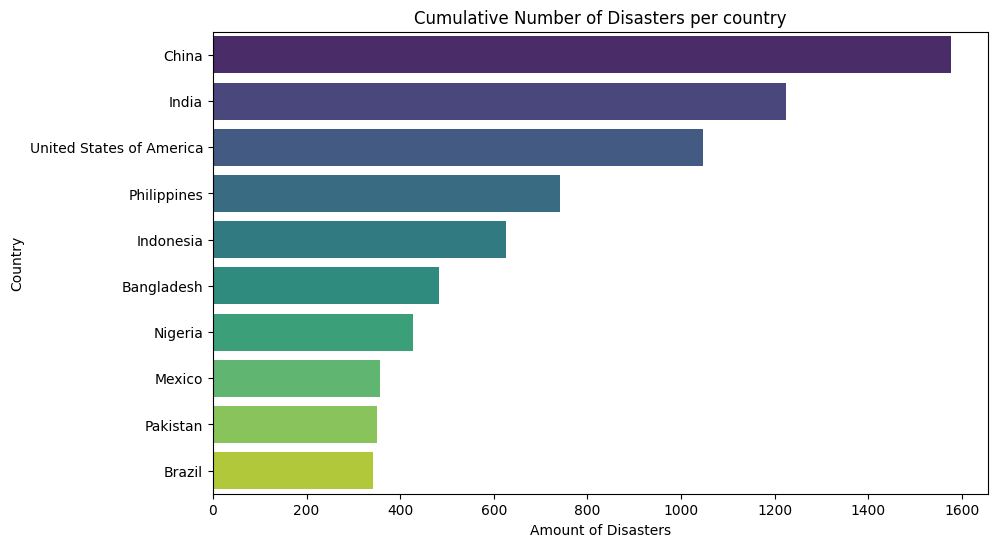

In [104]:
top_ten_country_amount_df = country_amount_df[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_country_amount_df['Amount'], y=top_ten_country_amount_df['Country'], hue=top_ten_country_amount_df['Country'], palette="viridis")
plt.title("Cumulative Number of Disasters per country")
plt.xlabel("Amount of Disasters")
plt.ylabel("Country")

plt.show()

### Frequencies of Disasters per location

In [36]:
countries = country_amount_df['Country'].values

frequencies_df = pd.DataFrame({'Country' : countries})

frequencies = []
for country in frequencies_df['Country']:
    amounts_per_year = [x for x in start_year_disasters_df[start_year_disasters_df['Country'] == country].groupby(['Year']).size()]
    frequencies.append(sum(amounts_per_year) / len(amounts_per_year))

frequencies_df['Frequency'] = frequencies

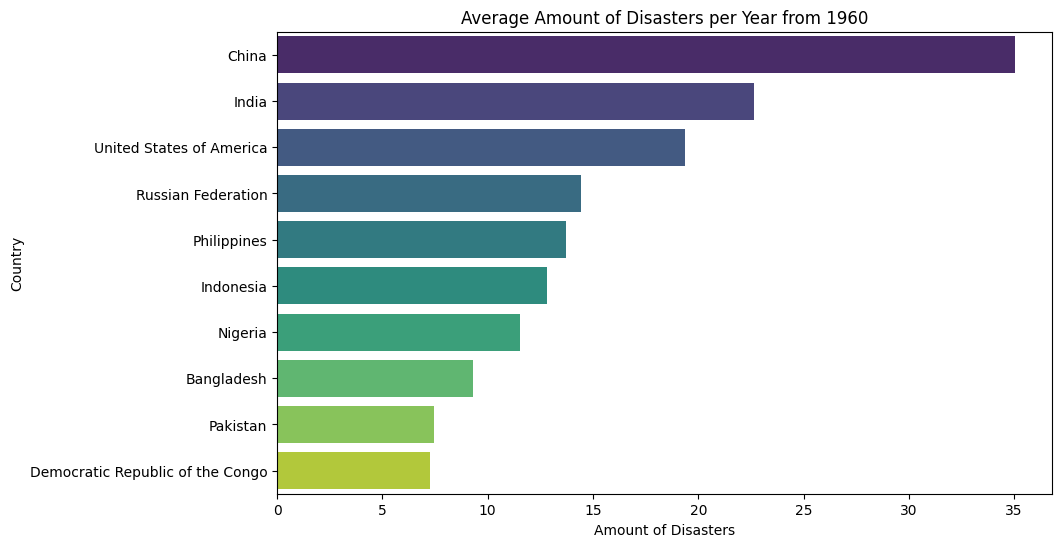

In [37]:
plot_frequencies_df = frequencies_df.sort_values(['Frequency'], ascending=False)[:10]

# plotting these values
plt.figure(figsize=(10, 6))
sns.barplot(x=plot_frequencies_df['Frequency'], y=plot_frequencies_df['Country'], hue=plot_frequencies_df['Country'], palette='viridis')
plt.title(f"Average Amount of Disasters per Year from {start_year}")
plt.xlabel("Amount of Disasters")
plt.ylabel("Country")

plt.show()

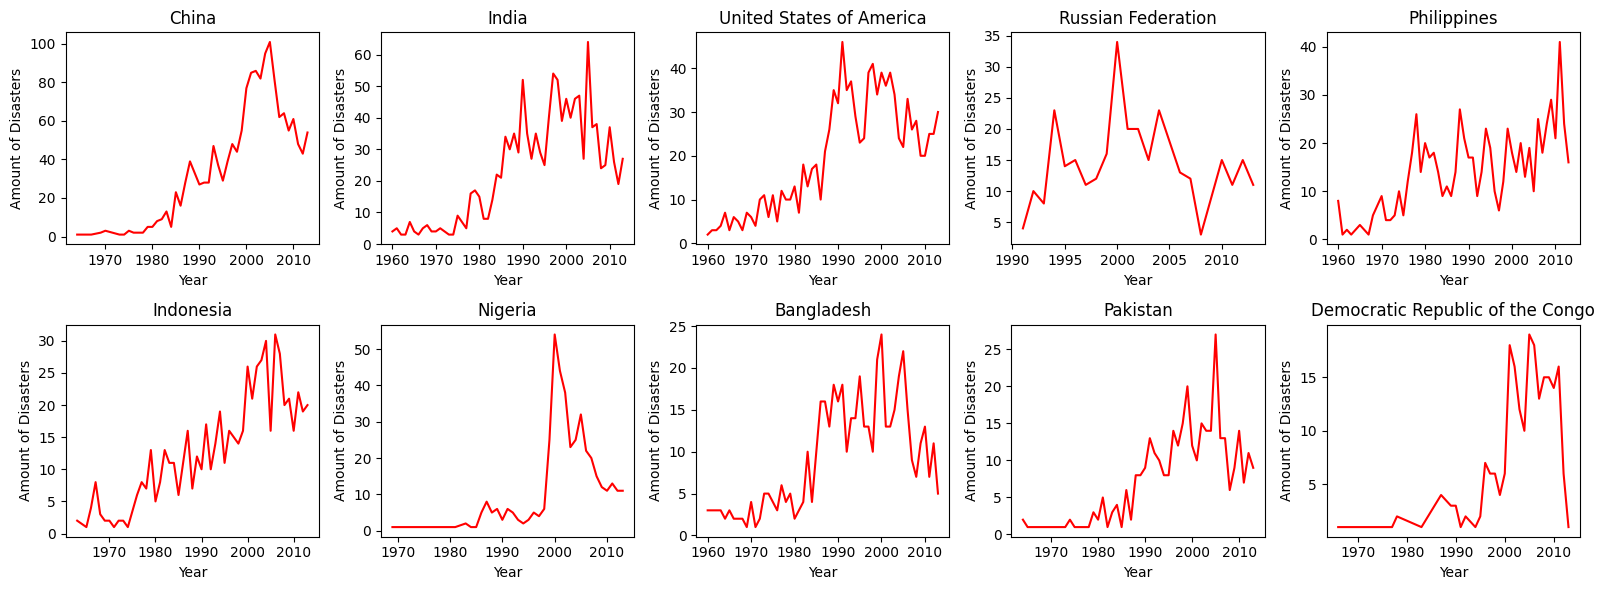

In [38]:
top_frequencies_df = plot_frequencies_df.copy()

plt.figure(figsize=(16, 6))

pos = 1
for country in top_frequencies_df['Country']:
    temp_df = start_year_disasters_df[start_year_disasters_df['Country'] == country]
    years =  temp_df['Year'].unique()
    frequencies = temp_df.groupby(['Year']).size().values

    plt.subplot(2, 5, pos)
    plt.plot(years, frequencies, 'r-')
    plt.xlabel('Year')
    plt.ylabel('Amount of Disasters')
    plt.title(f"{country}")
    pos += 1

plt.tight_layout()
plt.show()



What happens now if we look at the temperature for this data ?

/var/folders/1x/w221rhzd0xz0jl98kzlrnn100000gn/T/ipykernel_897/2877451348.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'United States' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  top_frequencies_df[top_frequencies_df['Country'] == "United States of America"] = "United States"


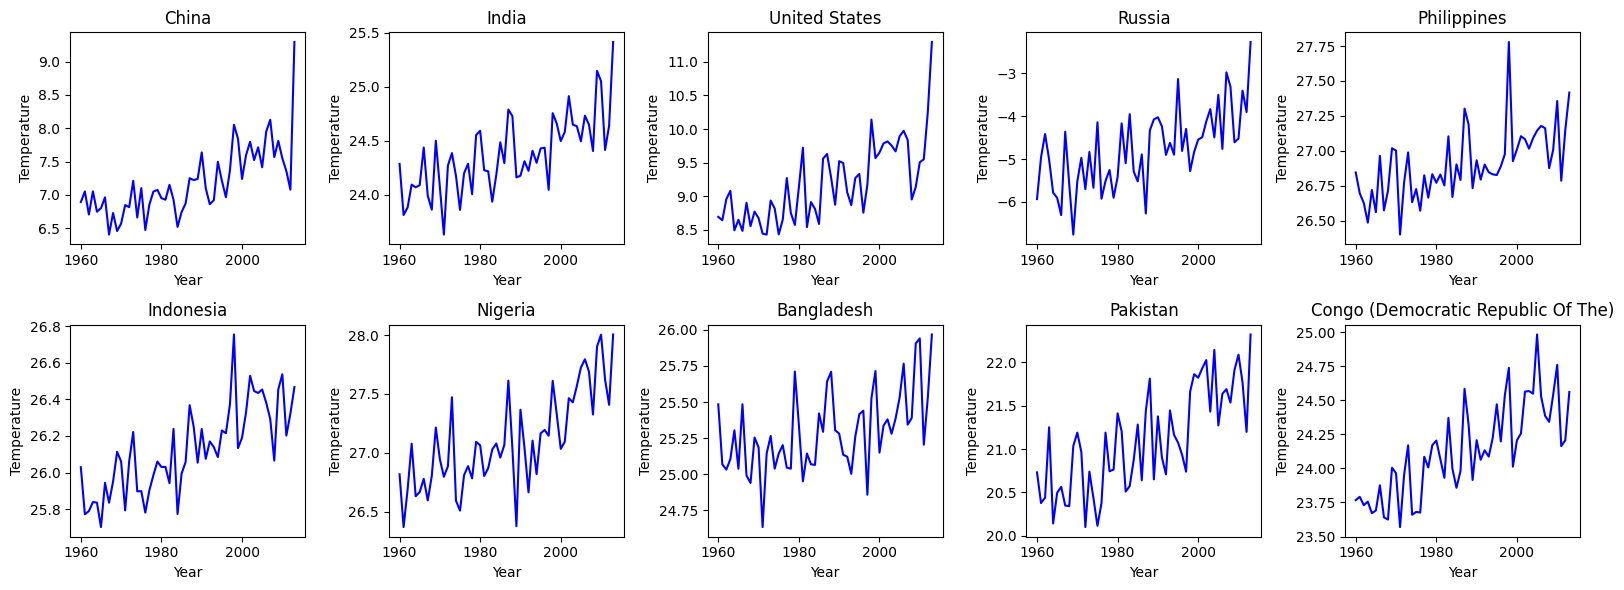

In [39]:
top_frequencies_df = plot_frequencies_df.copy()

plt.figure(figsize=(16, 6))

# changing country names that are different
top_frequencies_df[top_frequencies_df['Country'] == "United States of America"] = "United States"
top_frequencies_df[top_frequencies_df['Country'] == "Russian Federation"] = "Russia"
top_frequencies_df[top_frequencies_df['Country'] == "Democratic Republic of the Congo"] = "Congo (Democratic Republic Of The)"

pos = 1
for country in top_frequencies_df['Country']:
    temp_df = temps_clean_df[temps_clean_df['Country'] == country]


    temp_df = temp_df[temp_df['Year'] >= start_year]
    years =  temp_df['Year'].unique()
    temperatures = temp_df.groupby(['Year'])['AverageTemperature'].mean().values

    plt.subplot(2, 5, pos)
    plt.plot(years, temperatures, 'b-')
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.title(f"{country}")
    pos += 1

plt.tight_layout()
plt.show()


### Predicting the Number of Deaths in a Disaster
Using:
- The average temperature for the year the disaster was in at the location
- The magnitude of the disaster
- The year that the disaster occured in
- The magnitude scale - one hot encoded
- The location of the disaster - one hot encoded
- The disaster type - hot hot encoded

In [40]:
regression_df = pd.DataFrame()
regression_df[['Year', 'Magnitude', 'Magnitude Scale', 'Total_Deaths', 'Total_Damage']] = start_year_disasters_df[['Year', 'Magnitude', 'Magnitude Scale', 'Total_Deaths', "Total Damage ('000 US$)"]]

Getting the average temperature for each location for the year the disaster was in

In [41]:
average_temperatures = []
for index, row in start_year_disasters_df.iterrows():
    print(row['Year'])
    average_temperatures.append(temps_clean_df[(temps_clean_df['Country'] == row['Country']) & (temps_clean_df['Year'] == row['Year'])]['AverageTemperature'].mean())

1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964


In [42]:
import math

def check_location(df_main, row):
    if type(row) is float:
        return False
    if row == "Nationwide":
        return True
    
    row_locations = row.split(",")

    for location in row_locations:
        if location in df_main:
            return True
        
    return False


country_deaths_per_year = []
for index, row in start_year_disasters_df.iterrows():
    print(row['Year'])
    country_deaths_per_year.append(start_year_disasters_df[(start_year_disasters_df['Country'] == row['Country']) & (start_year_disasters_df['Year'] == row['Year'])]['Total_Deaths'].sum())

1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964


In [43]:
regression_df['AverageTemperature'] = average_temperatures
regression_df['TotalDeathsInCountryForYear'] = country_deaths_per_year

The **linear regression** model

Preprocessing the data - getting rid of the NaN values

In [82]:
regression_df.dropna(inplace=True)
ranged_df.dropna(inplace=True)
print(len(regression_df))

1101


/var/folders/1x/w221rhzd0xz0jl98kzlrnn100000gn/T/ipykernel_897/2308639508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranged_df.dropna(inplace=True)


I need to have **Multiple Linear Regression Models** each for a type of disaster - 5 models

In [45]:
# min-max normalisation on required rows
# regression_df['Year'] = (regression_df['Year'] - regression_df['Year'].min()) / (regression_df['Year'].max() - regression_df['Year'].min())
# regression_df['TotalDeaths'] = (regression_df['TotalDeaths'] - regression_df['TotalDeaths'].min()) / (regression_df['TotalDeaths'].max() - regression_df['TotalDeaths'].min())
# regression_df['TotalDeathsInCountryForYear'] = (regression_df['TotalDeathsInCountryForYear'] - regression_df['TotalDeathsInCountryForYear'].min()) / (regression_df['TotalDeathsInCountryForYear'].max() - regression_df['TotalDeathsInCountryForYear'].min())


In [46]:
print(regression_df['Magnitude Scale'].unique())

['Richter' 'Km2' 'Kph' '°C']


In [87]:
###
### Richter Scale
###
scales = regression_df['Magnitude Scale'].unique()
print(scales)

for scale in scales:
    richter_df = regression_df[regression_df['Magnitude Scale'] == scale]
    # preprocessing richter model
    richter_df = richter_df.copy()
    richter_df.dropna(inplace=True)

    print(f"SCALE: {scale} \t LENGTH: {len(richter_df)}")

    richter_df.drop('Magnitude Scale', axis=1, inplace=True)

    # splitting
    richter_X = richter_df.drop('Total_Deaths', axis=1)
    richter_y = richter_df['Total_Deaths']

    richter_X_train, richter_X_test, richter_y_train, richter_y_test = train_test_split(richter_X, richter_y, test_size=0.2, random_state=32)

    richter_model = LinearRegression()

    richter_model.fit(richter_X_train, richter_y_train)

    richter_predictions = richter_model.predict(richter_X_train)

    # richter_predictions = [0 if x < 0 else x for x in richter_predictions]

    # Evaluating the accuracy of the model
    print(f"Mean Square Error: {mean_squared_error(richter_y_train, richter_predictions)}")
    print(f"Mean Absolute Error: {mean_absolute_error(richter_y_train, richter_predictions)}")
    print(f"R2 Score: {r2_score(richter_y_train, richter_predictions)}")
    print("\n\n")

['Richter' 'Km2' 'Kph' '°C']
SCALE: Richter 	 LENGTH: 284
Mean Square Error: 238799277.95894155
Mean Absolute Error: 4967.788076211046
R2 Score: 0.6320649981698372



SCALE: Km2 	 LENGTH: 480
Mean Square Error: 162343.83911606146
Mean Absolute Error: 161.5662128009425
R2 Score: 0.19991847452359035



SCALE: Kph 	 LENGTH: 325
Mean Square Error: 33301836.849494334
Mean Absolute Error: 1953.426269391827
R2 Score: 0.5565167313277795



SCALE: °C 	 LENGTH: 12
Mean Square Error: 27685501.125411943
Mean Absolute Error: 3659.8159861544327
R2 Score: 0.46271899841020603





Plotting magnitude against total deaths in a disaster

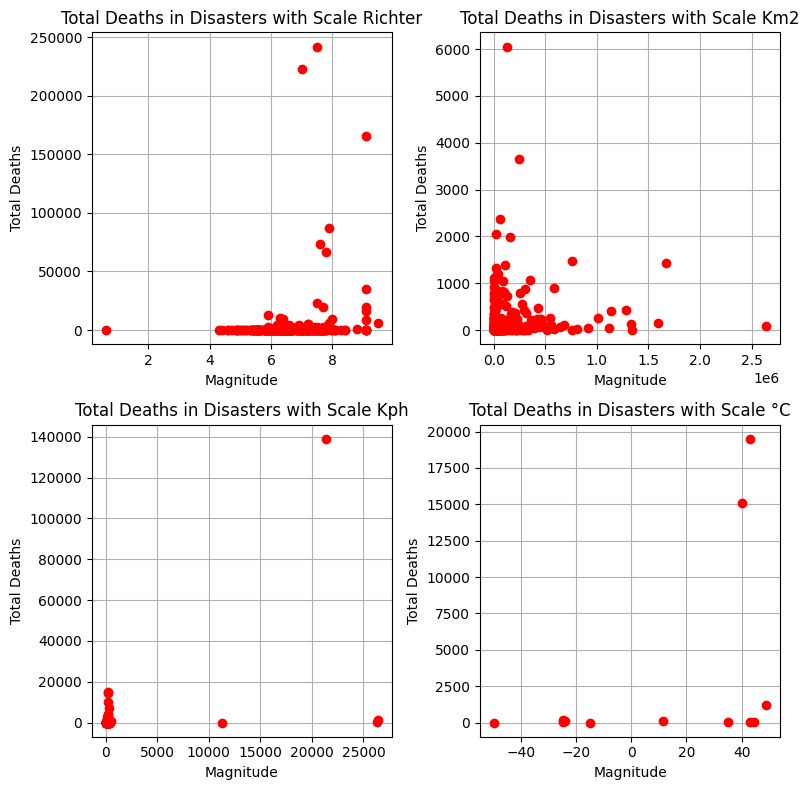

In [91]:
plt.figure(figsize=(8, 8))
index = 1
for scale in scales:
    scale_plot_df = regression_df[regression_df['Magnitude Scale'] == scale]
    plt.subplot(2, 2, index)
    plt.plot(scale_plot_df['Magnitude'], scale_plot_df['Total_Deaths'], 'ro')
    plt.xlabel('Magnitude')
    plt.ylabel('Total Deaths')
    plt.title(f'Total Deaths in Disasters with Scale {scale}')
    plt.grid(True)
    index += 1

plt.tight_layout()
plt.show()

Plotting average temperature in year with number of deaths in country in year ... this shows some interesting results

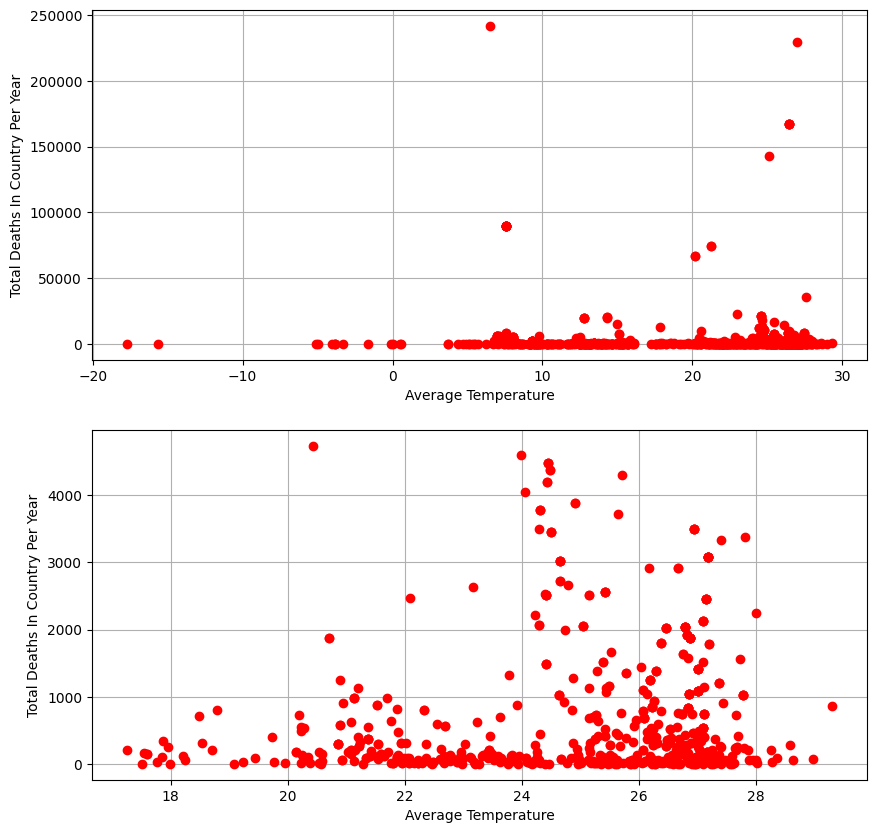

In [88]:
### 

# note - range is really large
# note - looking in the 25 to 30 range


plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(regression_df['AverageTemperature'], regression_df['TotalDeathsInCountryForYear'], 'ro')
plt.xlabel('Average Temperature')
plt.ylabel('Total Deaths In Country Per Year')
plt.grid(True)

ranged_df = regression_df[(regression_df['TotalDeathsInCountryForYear'] <= 5000) & (regression_df['AverageTemperature'] >= 17)]

plt.subplot(2, 1, 2)
plt.plot(ranged_df['AverageTemperature'], ranged_df['TotalDeathsInCountryForYear'], 'ro')
plt.xlabel('Average Temperature')
plt.ylabel('Total Deaths In Country Per Year')
plt.grid(True)
plt.show()

Average temperature in the year and the number of disasters

In [102]:
country_disaster_frequency = []
for index, row in start_year_disasters_df.iterrows():
    print(row['Year'])
    country_disaster_frequency.append(len(start_year_disasters_df[(start_year_disasters_df['Country'] == row['Country']) & (start_year_disasters_df['Year'] == row['Year'])]))

1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1960
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1961
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1962
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1963
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964
1964


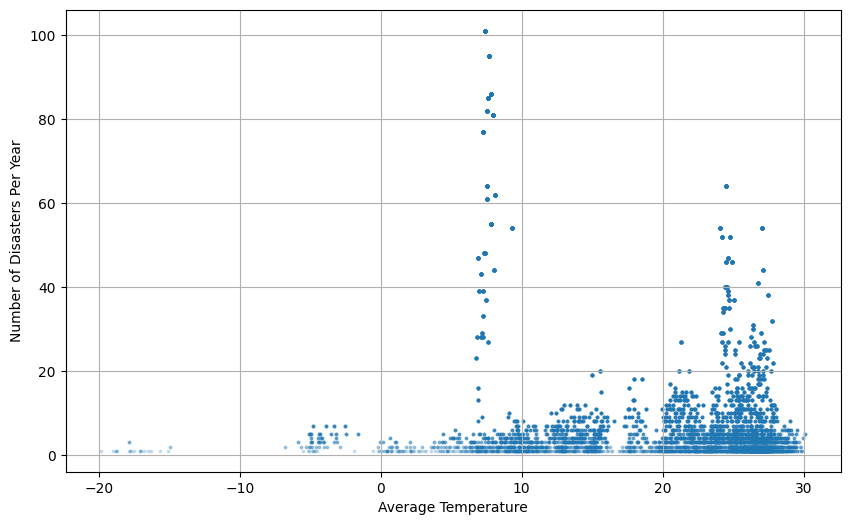

In [132]:
plot_df = pd.DataFrame({
    'AverageTemperature' : average_temperatures,
    'DisasterFreq' : country_disaster_frequency
})

plt.figure(figsize=(10, 6))
plt.scatter(plot_df['AverageTemperature'], plot_df['DisasterFreq'], alpha=0.2, s=3)
plt.xlabel('Average Temperature')
plt.ylabel('Number of Disasters Per Year')
plt.grid(True)
plt.show()

What does a simple linear regression model look like on this?

Index([], dtype='int64')


/Users/harryfindlay/Documents/University/Year3/Modules/ECM3420/CA/env_and_distasters/env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


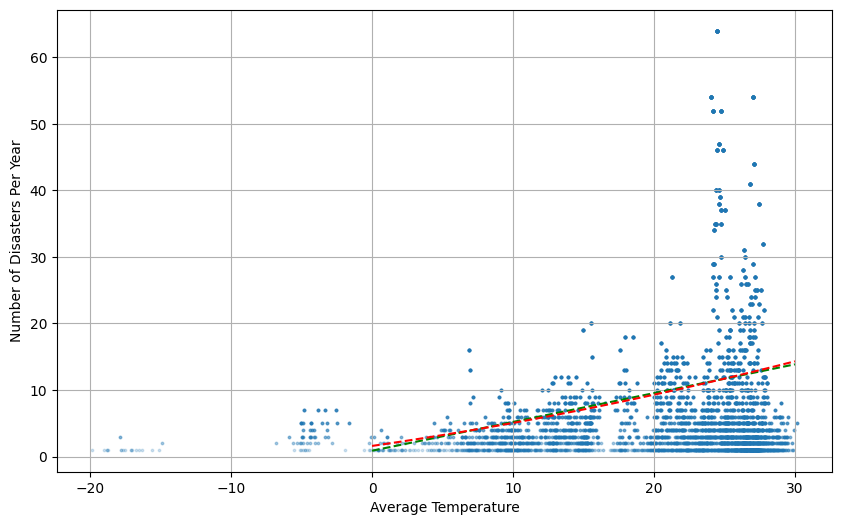

In [144]:
plot_df.dropna(inplace=True)

# removing outliers from above graph - less than 10 avg temperature and number of disasters per year is greater than 20
index_names = plot_df[(plot_df['AverageTemperature'] < 10) & (plot_df['DisasterFreq'] > 20)].index
print(index_names)
plot_df.drop(index_names, inplace=True)

# linear model
freq_X, freq_y = plot_df[['AverageTemperature']], plot_df['DisasterFreq']
freq_X_train, freq_X_test, freq_y_train, freq_y_test = train_test_split(freq_X, freq_y, test_size=0.2)

freq_model = LinearRegression()
freq_model.fit(freq_X_train, freq_y_train)

points_to_predict = np.asarray([x for x in range(int(plot_df[plot_df['AverageTemperature'] >= 0]['AverageTemperature'].min()), int(plot_df[plot_df['AverageTemperature'] >= 0]['AverageTemperature'].max()+1))]).reshape(-1, 1)
predictions = freq_model.predict(points_to_predict)

# polynomial model
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(freq_X_train)

poly_model = LinearRegression()
poly_model.fit(poly_features, freq_y_train)

poly_points_to_predict = poly.fit_transform(points_to_predict)
poly_predictions = poly_model.predict(poly_points_to_predict)

plt.figure(figsize=(10, 6))
plt.scatter(plot_df['AverageTemperature'], plot_df['DisasterFreq'], alpha=0.2, s=3)
plt.plot(points_to_predict, predictions, 'g--')
plt.plot(points_to_predict, poly_predictions, 'r--')
plt.xlabel('Average Temperature')
plt.ylabel('Number of Disasters Per Year')
plt.grid(True)
plt.show()


### Clustering
- Clustering based on the damage caused
- Clustering based on the number of deaths



Looking at the distribution of the number of deaths - using opacity to represent number of deaths

In [48]:
start_year = 1960

### CLEANING THE DATASET
clustering_df = disasters_df[disasters_df['Year'] >= start_year]
clustering_df = clustering_df.copy()
clustering_df.dropna(subset=['Total_Deaths'], inplace=True)

In [49]:
# varying the opacity based on number of deaths

# min-max scaling to put between 0 and 1 for opacity levels
clustering_df['Total_Deaths_Scaled'] = (clustering_df['Total_Deaths'] - clustering_df['Total_Deaths'].min()) / (clustering_df['Total_Deaths'].max() - clustering_df['Total_Deaths'].min())

clustering_df['Total_Deaths_per_10'] = (clustering_df['Total_Deaths'] / 10).astype(int)

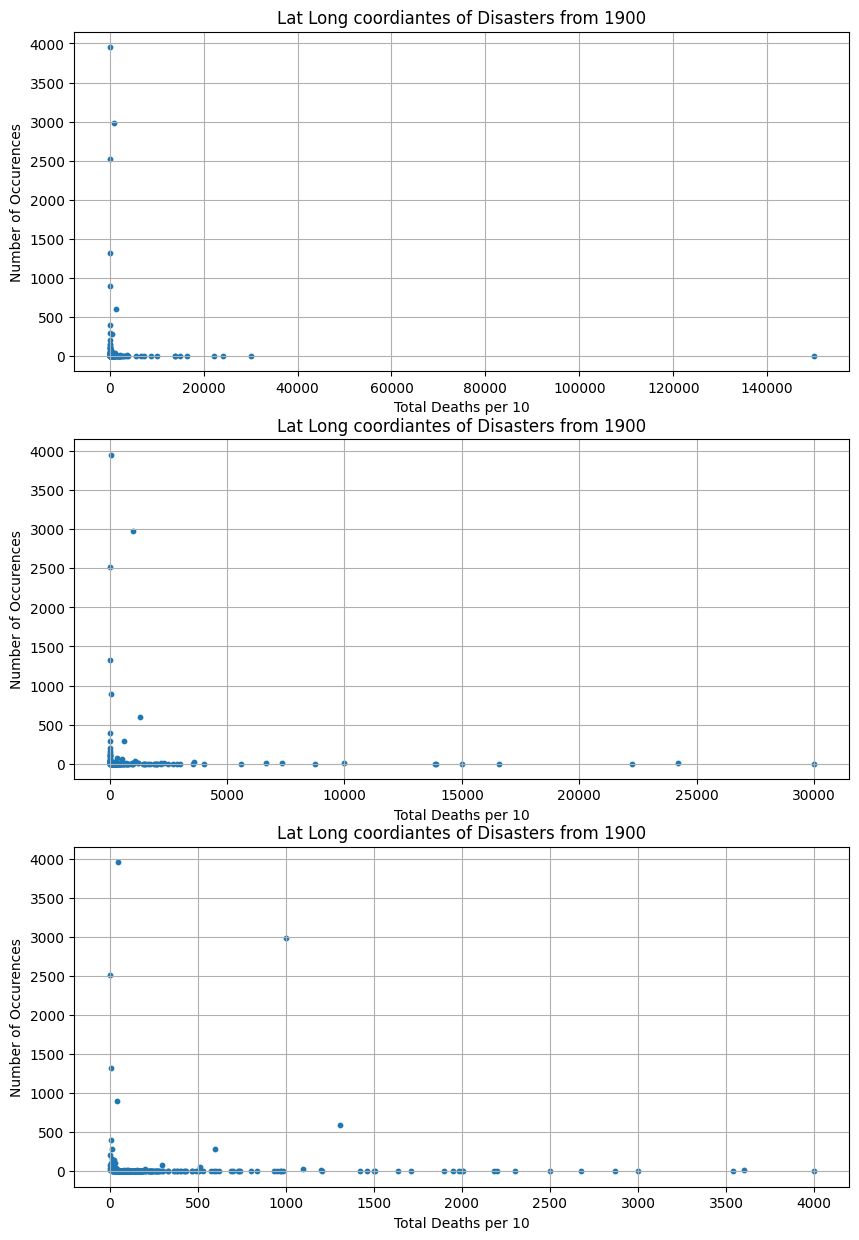

In [50]:
plot_df = pd.DataFrame({
    'Deaths' : clustering_df['Total_Deaths_per_10'].unique(),
    'Freq' : clustering_df.groupby(['Total_Deaths_per_10']).size()
})

plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.scatter(x=plot_df['Deaths'], y=plot_df['Freq'], s=10)
plt.xlabel('Total Deaths per 10')
plt.ylabel('Number of Occurences')
plt.title('Lat Long coordiantes of Disasters from 1900')
plt.grid(True)

plt.subplot(3, 1, 2)
plot_df = plot_df[plot_df['Deaths'] <= 30000]
plt.scatter(x=plot_df['Deaths'], y=plot_df['Freq'], s=10)
plt.xlabel('Total Deaths per 10')
plt.ylabel('Number of Occurences')
plt.title('Lat Long coordiantes of Disasters from 1900')
plt.grid(True)

plt.subplot(3, 1, 3)
plot_df = plot_df[plot_df['Deaths'] <= 5000]
plt.scatter(x=plot_df['Deaths'], y=plot_df['Freq'], s=10)
plt.xlabel('Total Deaths per 10')
plt.ylabel('Number of Occurences')
plt.title('Lat Long coordiantes of Disasters from 1900')
plt.grid(True)

plt.show()

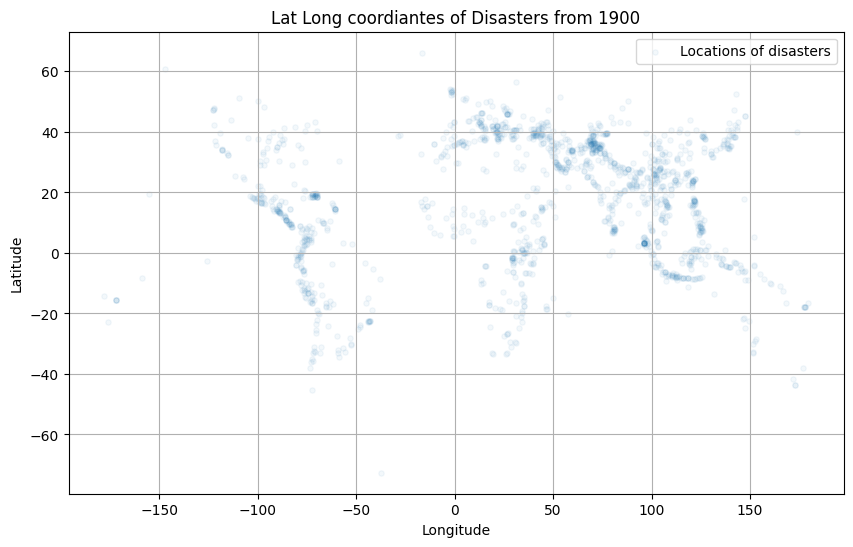

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(clustering_df['Longitude'], clustering_df['Latitude'], label="Locations of disasters", s=15, alpha=0.05)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat Long coordiantes of Disasters from 1900')
plt.legend()
plt.grid(True)

Mapping the opacity using the IQR of deaths

In [52]:
clustering_df['Total_Deaths'].describe()

count    1.547700e+04
mean     3.619705e+02
std      1.316514e+04
min      0.000000e+00
25%      1.100000e+01
50%      2.200000e+01
75%      4.800000e+01
max      1.500000e+06
Name: Total_Deaths, dtype: float64

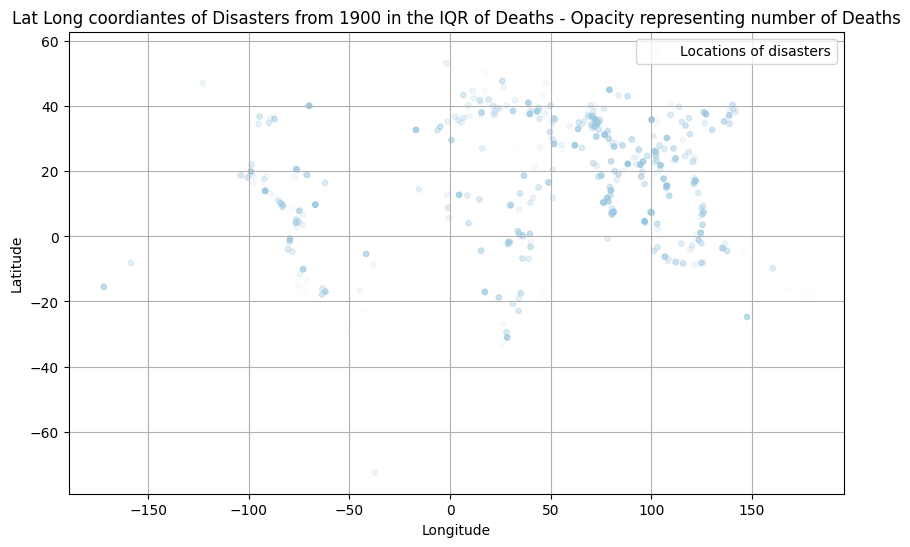

In [53]:
plot_df = clustering_df[(clustering_df['Total_Deaths'] >= 11) & (clustering_df['Total_Deaths'] <= 48)]

plot_df = plot_df.copy()
plot_df['Total_Deaths_Scaled'] = (plot_df['Total_Deaths'] - plot_df['Total_Deaths'].min()) / (plot_df['Total_Deaths'].max() - plot_df['Total_Deaths'].min())

colors = plt.cm.Blues(np.arange(0.2,0.4,(1/len(plot_df['Total_Deaths_Scaled'])/5)))
colors[:,-1] = plot_df['Total_Deaths_Scaled']

plt.figure(figsize=(10, 6))
plt.scatter(plot_df['Longitude'], plot_df['Latitude'], label="Locations of disasters", color=colors, s=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat Long coordiantes of Disasters from 1900 in the IQR of Deaths - Opacity representing number of Deaths')
plt.legend()
plt.grid(True)
plt.show()

**DBScan vs HDBScan**

In [54]:
from sklearn import metrics
from sklearn.cluster import DBSCAN, HDBSCAN, KMeans

[15395, 1, 4, 2, 21, 6, 2, 46]
Number of Cluster: 8	 Number of Noise Points: 0


/Users/harryfindlay/Documents/University/Year3/Modules/ECM3420/CA/env_and_distasters/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


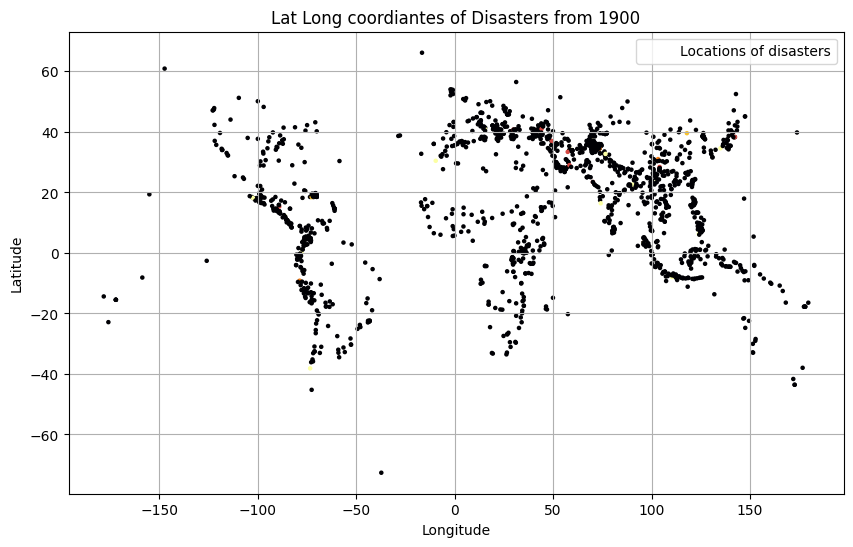

In [61]:
clustering_X = clustering_df['Total_Deaths'].values.reshape(-1, 1)

n_clusters = 8
db = KMeans(n_clusters=n_clusters).fit(clustering_X)

labels = db.labels_

# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise = list(labels).count(-1)

counts = [0] * n_clusters
for label in set(labels):
    for val in labels:
        if label == val:
            counts[label] += 1

print(counts)

print(f"Number of Cluster: {n_clusters}\t Number of Noise Points: {n_noise}")

plt.figure(figsize=(10, 6))
plt.scatter(clustering_df['Longitude'], clustering_df['Latitude'], label="Locations of disasters", c=labels, cmap='inferno', s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat Long coordiantes of Disasters from 1900')
plt.legend()
plt.grid(True)
plt.show()